# Criando a Base de Dados

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
ages = np.random.randint(low=15, high=70, size=40)

ages

array([53, 66, 43, 29, 57, 22, 35, 53, 33, 37, 25, 25, 38, 67, 50, 54, 38,
       17, 36, 67, 16, 38, 58, 44, 52, 16, 35, 47, 26, 36, 58, 39, 63, 41,
       56, 42, 30, 29, 61, 65])

In [2]:
labels = []
for age in ages:
    if age < 30:
        labels.append(0)
    else:
        labels.append(1)
        
#random swap
for i in range(0, 3):
    r = np.random.randint(0, len(labels) - 1)
    if labels[r] == 0:
        labels[r] = 1
    else:
        labels[r] = 0        

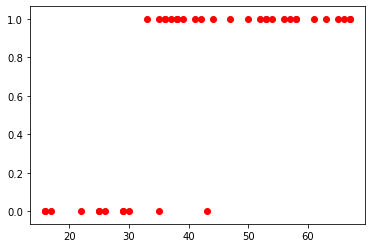

In [3]:
plt.scatter(ages, labels, color="red")
plt.show()

# Predição usando Regressão Linear

In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(ages.reshape(-1, 1), labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
#y = m.x + b
m = model.coef_[0]
b = model.intercept_

# Entendendo os Coeficientes da Reta

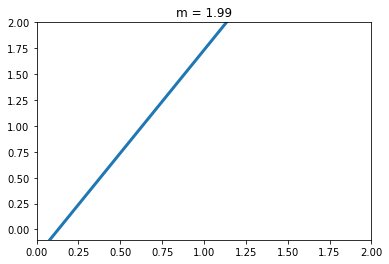

In [6]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()

# marking the x-axis and y-axis  
axis = plt.axes(xlim =(0, 2),  
                ylim =(-0.1, 2))

# initializing a line variable  
line, = axis.plot([], [], lw = 3)  

# data which the line will  
# contain (x, y)  
def init():  
    line.set_data([], [])  
    return line,  

def animate(i):
    m_copy = i * 0.01
    plt.title('m = ' + str(m_copy))
    x = np.arange(0.0, 10.0, 0.1)
    y = m_copy * x + b
    line.set_data(x, y)  

    return line,

ani = FuncAnimation(fig, animate, init_func = init,  
                    frames = 200,  
                    interval = 20,  
                    blit = True)

ani.save('m.mp4', writer = 'ffmpeg', fps = 30) 

In [7]:
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="m.mp4" type="video/mp4">
</video></div>""")

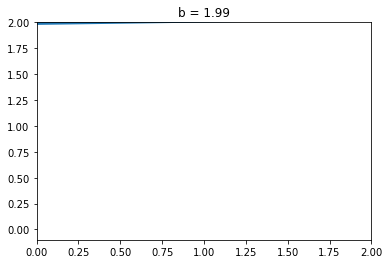

In [8]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()

# marking the x-axis and y-axis  
axis = plt.axes(xlim =(0, 2),  
                ylim =(-0.1, 2))

# initializing a line variable  
line, = axis.plot([], [], lw = 3)  

# data which the line will  
# contain (x, y)  
def init():  
    line.set_data([], [])  
    return line,  

def animate(i):
    b_copy = i * 0.01
    plt.title('b = ' + str(b_copy))
    x = np.arange(0.0, 10.0, 0.1)
    y = m * x + b_copy
    line.set_data(x, y)  

    return line,

ani = FuncAnimation(fig, animate, init_func = init,  
                    frames = 200,  
                    interval = 20,  
                    blit = True)

ani.save('b.mp4',  
          writer = 'ffmpeg', fps = 30) 

In [9]:
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="b.mp4" type="video/mp4">
</video></div>""")

# Regressão Linear daquele Conjunto de Pontos

33.56240438551759


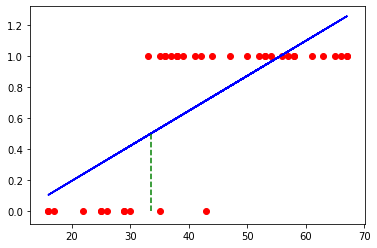

In [10]:
#0.5 = m.x + b
#0.5 - b = m.x
#(0.5 - b) / m = x
limiar_idade = (0.5 - b) / m
print(limiar_idade)

plt.plot(ages, ages * m + b, color = 'blue')
plt.plot([limiar_idade, limiar_idade], [0, 0.5], '--', color = 'green')
plt.scatter(ages, labels, color="red")
plt.show()

# Função Logística

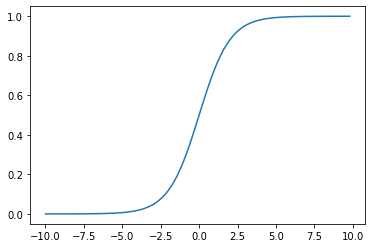

In [11]:
import math

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)

plt.plot(x, sig)
plt.show()

# Classificador Sigmóide

33.331480587172706


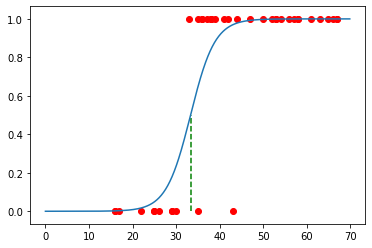

In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(ages.reshape(-1, 1), labels)

#y = m.x + b
m = model.coef_[0][0]
b = model.intercept_[0]

x = np.arange(0, 70, 0.1)
sig = sigmoid(m*x + b)

limiar_idade = 0 - (b / m)
print(limiar_idade)

plt.scatter(ages, labels, color="red")
plt.plot([limiar_idade, limiar_idade], [0, 0.5], '--', color = 'green')
plt.plot(x, sig)
plt.show()